# Solar energy time series analysis and data transformation

In [ ]:
# librairies

import pandas as pd # data processing
import numpy as np # linear algebra

#from tqdm import tqdm

import matplotlib.pyplot as plt # used for graph plot
import plotly.express as px # used for interactive graph
import seaborn as sns # graph plot
from matplotlib import pylab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving solar-15m_2019-09-01_2020-09-30.csv to solar-15m_2019-09-01_2020-09-30 (1).csv


In [ ]:
PV_df = pd.read_csv('solar-15m_2019-09-01_2020-09-30.csv')

In [ ]:
PV_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38008 entries, 0 to 38007
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   time                                  38008 non-null  object 
 1   Solarenergie_Hochrechnung_50Hertz     38008 non-null  int64  
 2   Solarenergie_Hochrechnung_Amprion     38008 non-null  float64
 3   Solarenergie_Hochrechnung_TenneT_TSO  38008 non-null  float64
 4   Solarenergie_Hochrechnung_TransnetBW  38008 non-null  float64
 5   Solarenergie_Prognose_50Hertz         38008 non-null  float64
 6   Solarenergie_Prognose_Amprion         38008 non-null  int64  
 7   Solarenergie_Prognose_TenneT_TSO      38008 non-null  float64
 8   Solarenergie_Prognose_TransnetBW      38008 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.6+ MB


In [ ]:
# Number of missing values in each column of dataframe
missing_val = (PV_df.isna().sum())
print("missing values in each column: \n",missing_val)

missing values in each column: 
 time                                    0
Solarenergie_Hochrechnung_50Hertz       0
Solarenergie_Hochrechnung_Amprion       0
Solarenergie_Hochrechnung_TenneT_TSO    0
Solarenergie_Hochrechnung_TransnetBW    0
Solarenergie_Prognose_50Hertz           0
Solarenergie_Prognose_Amprion           0
Solarenergie_Prognose_TenneT_TSO        0
Solarenergie_Prognose_TransnetBW        0
dtype: int64


In [ ]:
PV_df['time'] = pd.to_datetime(PV_df['time'], format='%Y-%m-%d %H:%M')

PV_df['Date'] = [d.date() for d in PV_df['time']]
PV_df['Time'] = [d.time() for d in PV_df['time']]

PV_df = PV_df.set_index(['time'])
PV_df.head()

,Solarenergie_Hochrechnung_50Hertz,Solarenergie_Hochrechnung_Amprion,Solarenergie_Hochrechnung_TenneT_TSO,Solarenergie_Hochrechnung_TransnetBW,Solarenergie_Prognose_50Hertz,Solarenergie_Prognose_Amprion,Solarenergie_Prognose_TenneT_TSO,Solarenergie_Prognose_TransnetBW,Date,Time
time,,,,,,,,,,
2019-09-01 00:00:00,0,0.0,19.29,0.0,0.0,0,0.0,0.0,2019-09-01,00:00:00
2019-09-01 00:15:00,0,0.0,19.26,0.0,0.0,0,0.0,0.0,2019-09-01,00:15:00
2019-09-01 00:30:00,0,0.0,19.26,0.0,0.0,0,0.0,0.0,2019-09-01,00:30:00
2019-09-01 00:45:00,0,0.0,19.24,0.0,0.0,0,0.0,0.0,2019-09-01,00:45:00
2019-09-01 01:00:00,0,0.0,19.25,0.0,0.0,0,0.0,0.0,2019-09-01,01:00:00


In [ ]:
# start and end dates of the time series
print ("solar energy dataset: start_date = {}, end_date = {} \n".format(PV_df.index.min(), PV_df.index.max()))

solar energy dataset: start_date = 2019-09-01 00:00:00, end_date = 2020-09-30 23:45:00 



CPU times: user 1.22 s, sys: 134 ms, total: 1.36 s
Wall time: 1.23 s


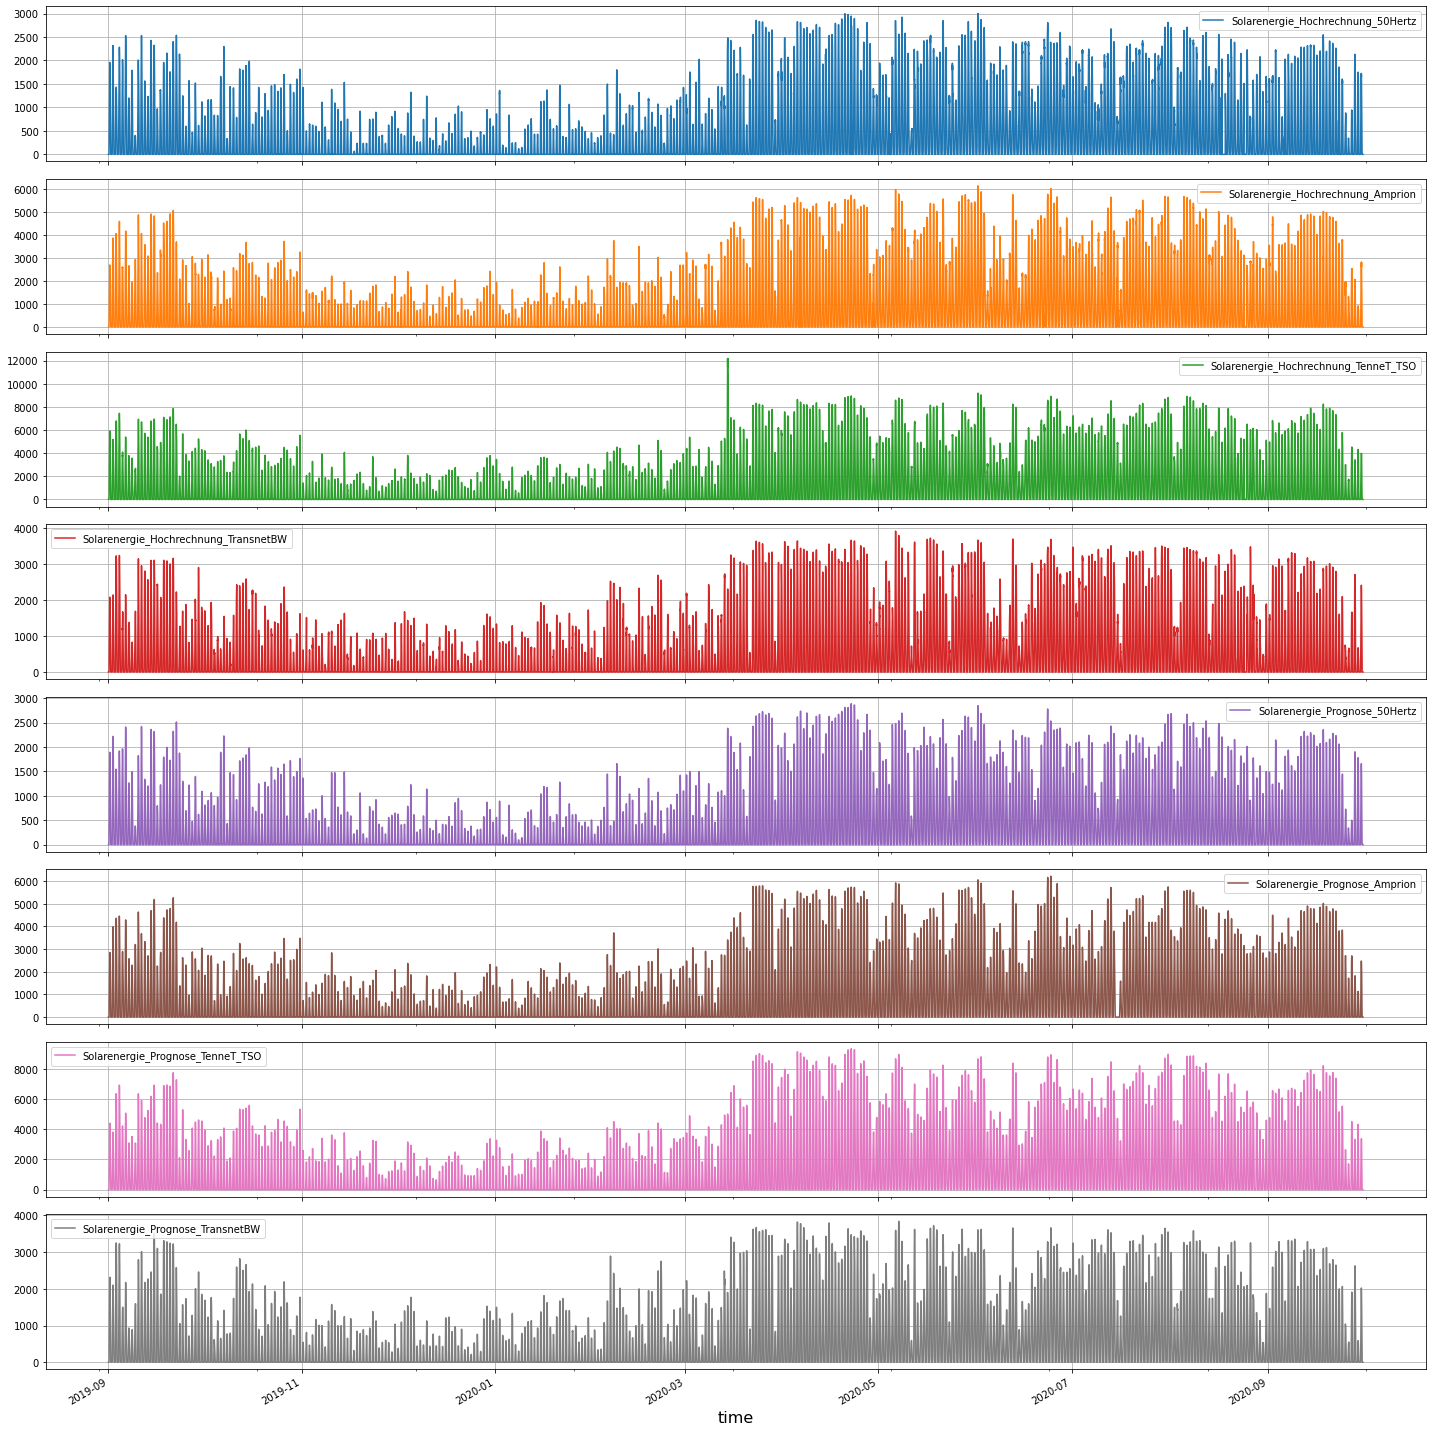

In [ ]:
%%time
PV_df.plot(grid =True, subplots=True, figsize = (20, 20))
plt.xlabel('time', fontsize=16)
plt.legend(loc="upper left")
plt.tight_layout()

In [ ]:
PV_df.describe()

,Solarenergie_Hochrechnung_50Hertz,Solarenergie_Hochrechnung_Amprion,Solarenergie_Hochrechnung_TenneT_TSO,Solarenergie_Hochrechnung_TransnetBW,Solarenergie_Prognose_50Hertz,Solarenergie_Prognose_Amprion,Solarenergie_Prognose_TenneT_TSO,Solarenergie_Prognose_TransnetBW
count,38008.000000,38008.000000,38008.000000,38008.000000,38008.000000,38008.000000,38008.000000,38008.000000
mean,462.177436,926.205062,1452.928826,604.353510,454.110426,931.043938,1468.973709,611.117293
std,713.049598,1426.354385,2208.276154,937.556812,689.577612,1435.612796,2219.470100,939.964380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,16.915000,22.380000,4.700000,20.275000,11.000000,56.705000,5.011000
75%,727.000000,1449.825000,2349.877500,922.042750,713.612500,1486.000000,2396.560000,964.000000
max,3002.000000,6143.340000,12175.040000,3913.492000,2888.910000,6214.000000,9337.710000,3839.000000


### Dataset transformation

In [ ]:
PV_df = PV_df.reset_index(['time'])
#aggregate_pv_df = PV_df.copy()[['Date', 'Time']]
aggregate_pv_df = PV_df.copy()[['time']]
aggregate_pv_df['Hochrechnung_Total'] =  PV_df[['Solarenergie_Hochrechnung_50Hertz','Solarenergie_Hochrechnung_Amprion', 'Solarenergie_Hochrechnung_TenneT_TSO', 'Solarenergie_Hochrechnung_TransnetBW']].sum(axis=1)
aggregate_pv_df['Prognose_Total'] =  PV_df[['Solarenergie_Prognose_50Hertz','Solarenergie_Prognose_Amprion', 'Solarenergie_Prognose_TenneT_TSO', 'Solarenergie_Prognose_TransnetBW']].sum(axis=1)

aggregate_pv_df = aggregate_pv_df.set_index(['time'])
aggregate_pv_df.head()

,Hochrechnung_Total,Prognose_Total
time,,
2019-09-01 00:00:00,19.29,0.0
2019-09-01 00:15:00,19.26,0.0
2019-09-01 00:30:00,19.26,0.0
2019-09-01 00:45:00,19.24,0.0
2019-09-01 01:00:00,19.25,0.0


In [ ]:
aggregate_pv_df.describe()

,Hochrechnung_Total,Prognose_Total
count,38008.000000,38008.000000
mean,3445.664834,3465.245366
std,5215.502227,5226.591542
min,0.000000,0.000000
25%,0.000000,0.000000
50%,64.983000,102.846000
75%,5568.019250,5646.007000
max,21944.654000,21410.620000


CPU times: user 133 ms, sys: 8.75 ms, total: 142 ms
Wall time: 150 ms


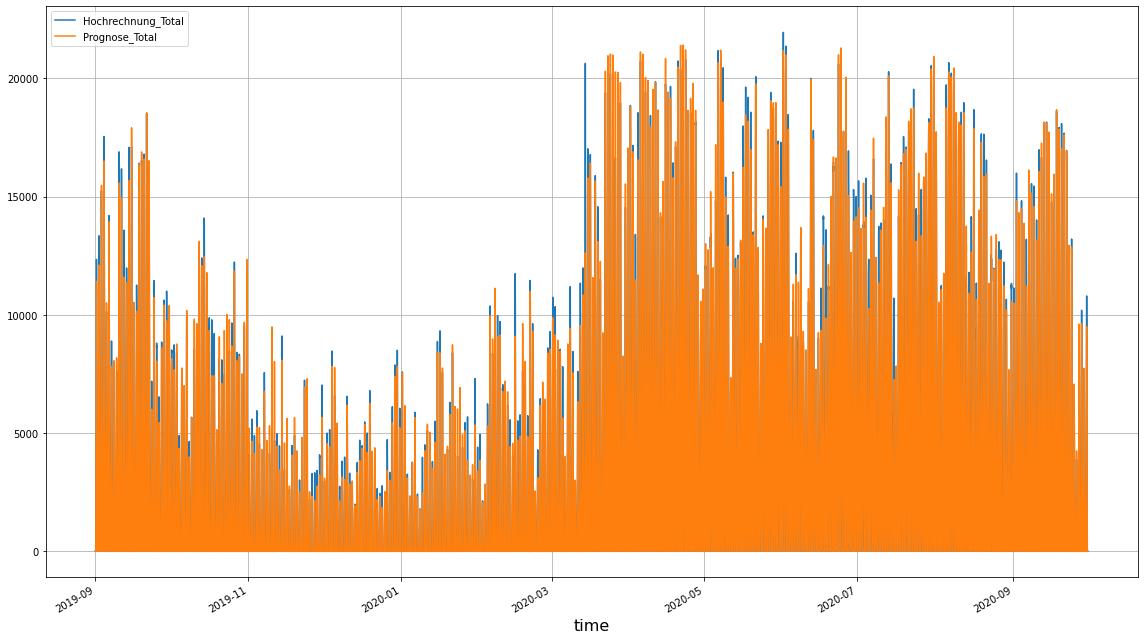

In [ ]:
%%time
aggregate_pv_df['Hochrechnung_Total'].plot(grid = True, figsize = (16, 9))
aggregate_pv_df['Prognose_Total'].plot(grid = True, figsize = (16, 9))
plt.xlabel('time', fontsize=16)
plt.legend(loc="upper left")
plt.tight_layout()

### Heatmap visualization

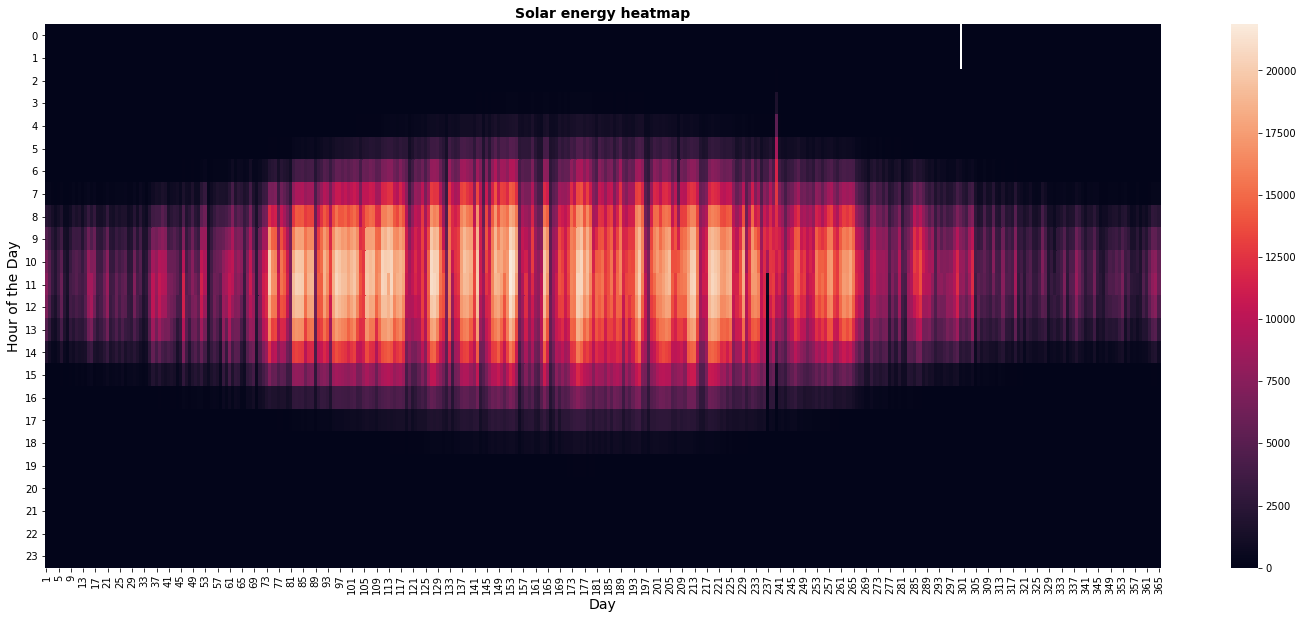

In [ ]:
pv_heatmap_df = aggregate_pv_df.copy()
pv_heatmap_df = pv_heatmap_df.reset_index()

time_series_2020 = (pv_heatmap_df['time'] >= ('2019-09-01')) & (pv_heatmap_df['time'] <= ('2020-09-30'))
from_jan_2020 = pv_heatmap_df.loc[time_series_2020]
from_jan_2020 = from_jan_2020.set_index(['time'])

#Create variables for Day and hour
from_jan_2020['day'] = [i.dayofyear for i in from_jan_2020.index]
from_jan_2020['hour'] = [i.hour for i in from_jan_2020.index]

# group by month and year, get the average
from_jan_2020 = from_jan_2020.groupby(['day', 'hour']).mean()

from_jan_2020= from_jan_2020['Hochrechnung_Total'].unstack(level=0)

fig, ax = plt.subplots(figsize=(25, 10))
#cmap = "Reds"
#cmap = "RdPu"
#cmap = "YlOrRd"
#cmap = "autumn"
#cmap = "hot"
#cmap="OrRd"
#cmap = "Oranges"
sns.heatmap(from_jan_2020, vmin=0)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Hour of the Day", fontsize=14)

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.yticks(rotation=0)
#plt.xticks(rotation=0)

plt.title('Solar energy heatmap', fontsize=14, fontweight='bold')
plt.show()

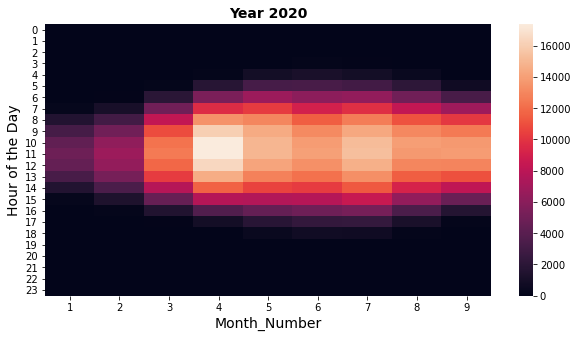

In [ ]:
pv_heatmap_df2 = aggregate_pv_df.copy()
pv_heatmap_df2 = pv_heatmap_df2.reset_index()

time_series_2020 = (pv_heatmap_df2['time'] >= ('2020-01-01')) & (pv_heatmap_df2['time'] <= ('2020-09-30'))
from_jan_2020 = pv_heatmap_df2.loc[time_series_2020]
from_jan_2020 = from_jan_2020.set_index(['time'])

#Create variables for Day and hour
from_jan_2020['month'] = [i.month for i in from_jan_2020.index]
from_jan_2020['hour'] = [i.hour for i in from_jan_2020.index]

# group by month and year, get the average
from_jan_2020 = from_jan_2020.groupby(['month', 'hour']).mean()
from_jan_2020 = from_jan_2020['Hochrechnung_Total'].unstack(level=0)

fig, ax = plt.subplots(figsize=(10, 5))

#cmap = "Reds"
#cmap = "RdPu"
#cmap="OrRd"
#cmap = "Oranges"

#import cmocean
#cmap = cmocean.cm.oxy
#plt.contourf(from_jan_2020, 20, cmap=cmap)

sns.heatmap(from_jan_2020, vmin=0)
plt.title('Year 2020', fontsize=14, fontweight='bold')
plt.xlabel("Month_Number", fontsize=14)
plt.ylabel("Hour of the Day", fontsize=14)
plt.show()

##### Frequency Time Series Decomposition
##### The frequency of decomposition must be an interval, which 'may' repeat. So we have data with 15min frequency and we are looking for a weekly repetition behavior. To look for a weekly repetition behavior, let's use: $decompfreq = \cfrac{24h \cdot 60min}{15min} \cdot 7days$

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



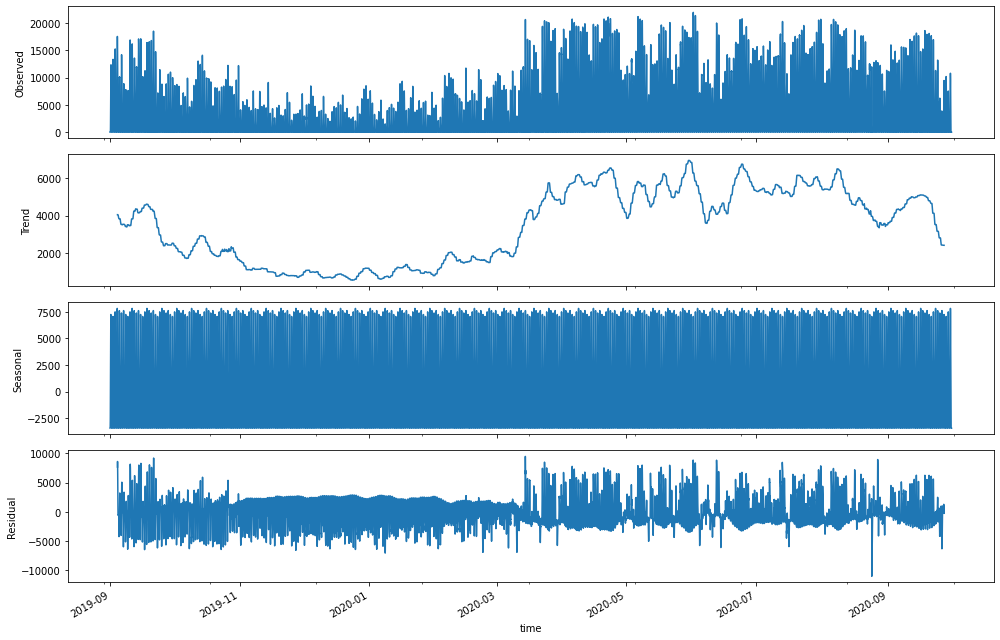

In [ ]:
import statsmodels.api as sm
#import statsmodels.api as sm


decompfreq = int(((24*60)/15)*7)
res = sm.tsa.seasonal_decompose(aggregate_pv_df.Hochrechnung_Total.interpolate(),
                               freq=decompfreq,model='additive')
pylab.rcParams['figure.figsize'] = (14, 9)
resplot = res.plot()

In [ ]:
aggregate_pv_df.to_csv("solar.csv", index=True)